# BBB Existing Customer Analysis

## Preprocessing

In [2]:
import gender_guesser.detector as gender
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import sys
if '../catools' not in sys.path:
    sys.path.append('../catools')
from catools import *

In [22]:
# Bring the data together in a single df
df1 = pd.read_csv("items-2016-03-06-2017-03-07.csv")
df2 = pd.read_csv("items-2017-03-06-2018-03-07.csv")
df = pd.concat([df1, df2])
df = df.drop(['Time Zone', 'Category', 'Price Point Name', 'SKU', 'Modifiers Applied', 'Gross Sales',
       'Discounts', 'Payment ID', 'Device Name', 'Details',
       'Event Type', 'Dining Option', 'Customer Reference ID',], axis=1)

names_df = pd.read_csv('export-20180306-190210.csv')

In [4]:
# Turn net sales into a float
df['Net Sales'] = df['Net Sales'].replace('[\$,]', '', regex=True).astype(float)

## Repeat Customers

33.33% of transactions involve repeat customers


/usr/local/bin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Pier Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


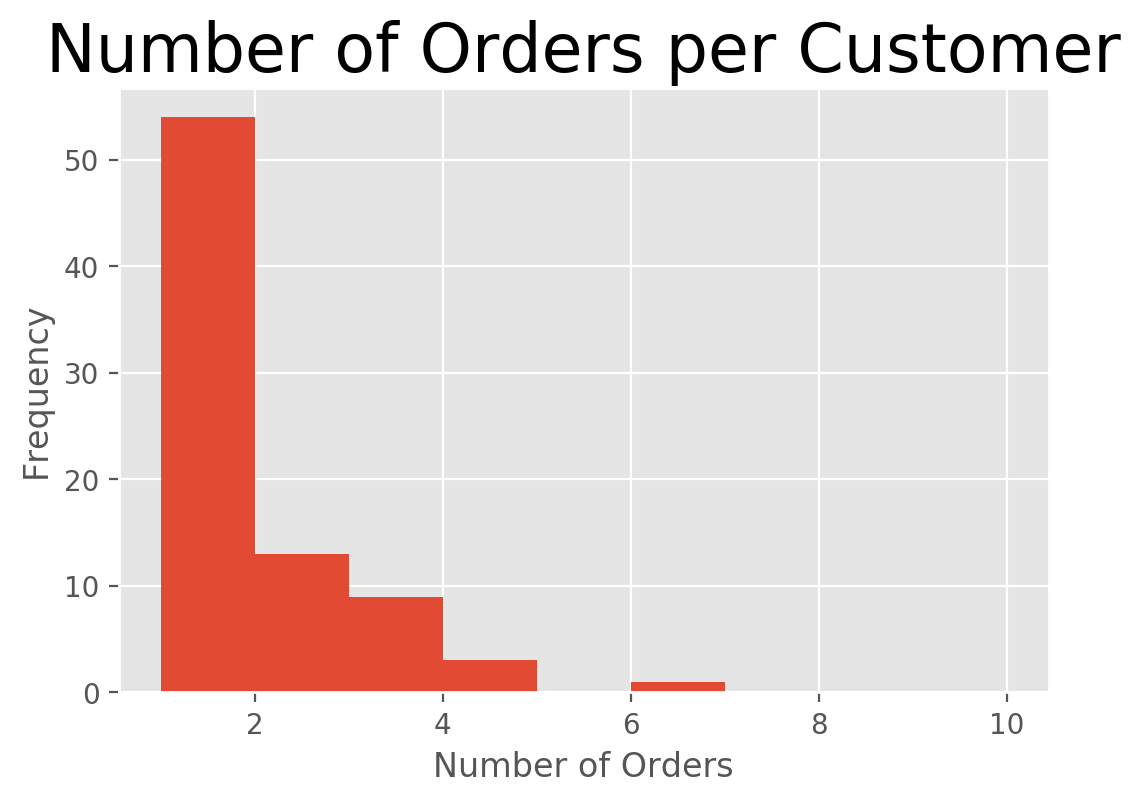

In [21]:
purchase_frequency(df['Customer ID'].values)
plt.show()

## Gender Breakdown

Out of 107 total customers:
	54 (50.47%) cusomters were Andro/Unknown
	5 (4.67%) cusomters were Male
	48 (44.86%) cusomters were Female


/usr/local/bin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Pier Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


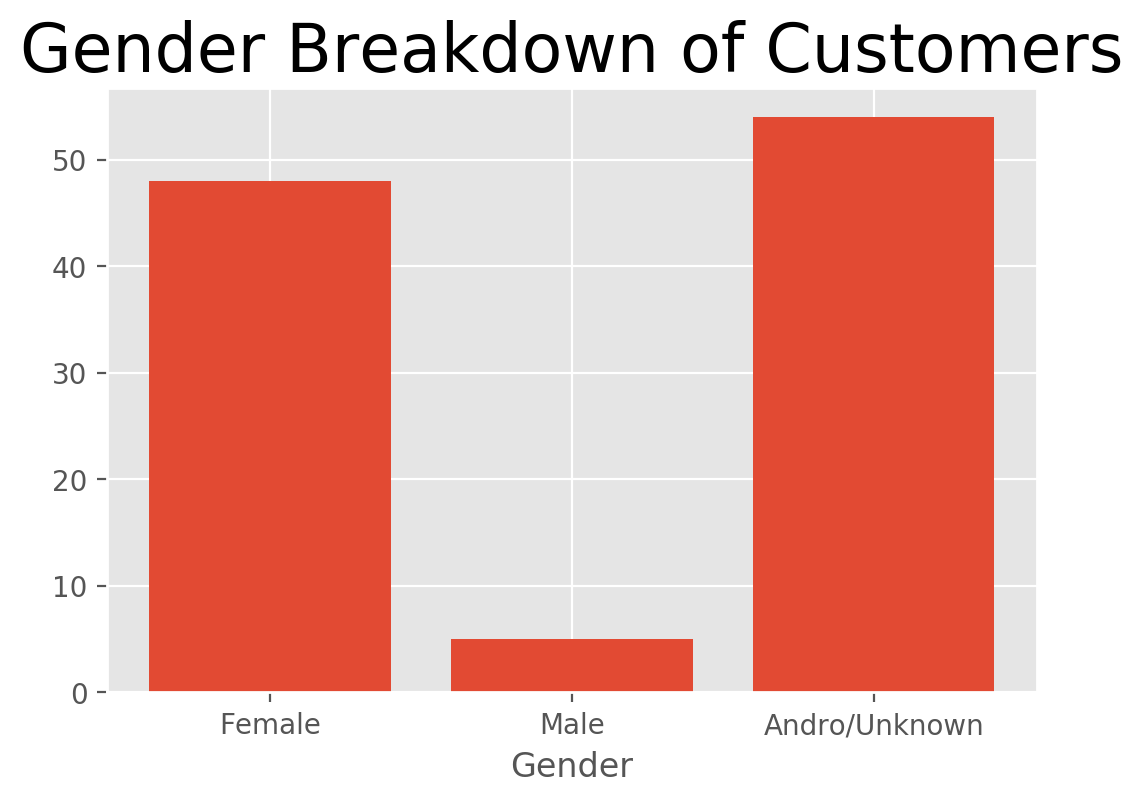

In [20]:
gender_breakdown(names_df['First Name'].values)
plt.show()

## Average Purchase

Your avaerage purchase is $50.31712574850299.


/usr/local/bin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Pier Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


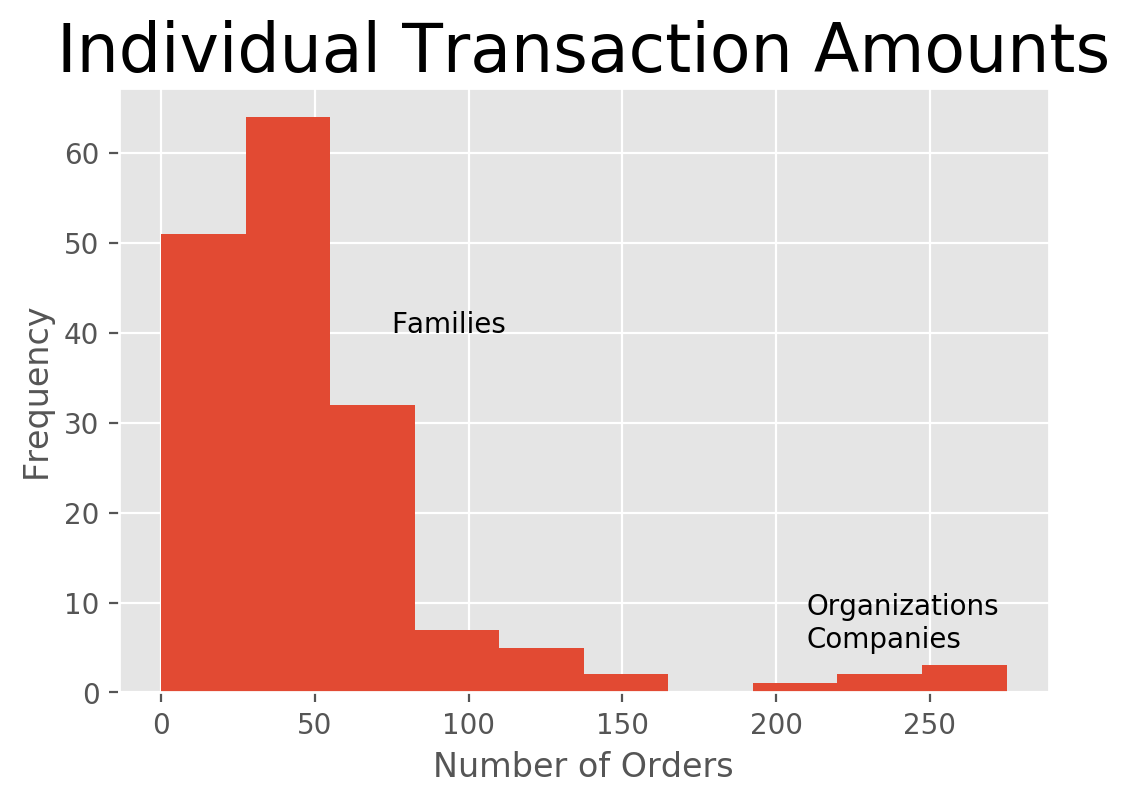

In [19]:
average_purchase(df['Net Sales'])
plt.annotate("Families", xy=(75, 40))
plt.annotate("Organizations\nCompanies", xy=(210, 5))
plt.show()

## Lifetime Value of Customer

Your avaerage customer is worth $103.74024691358024 over their lifetime.


/usr/local/bin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Pier Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


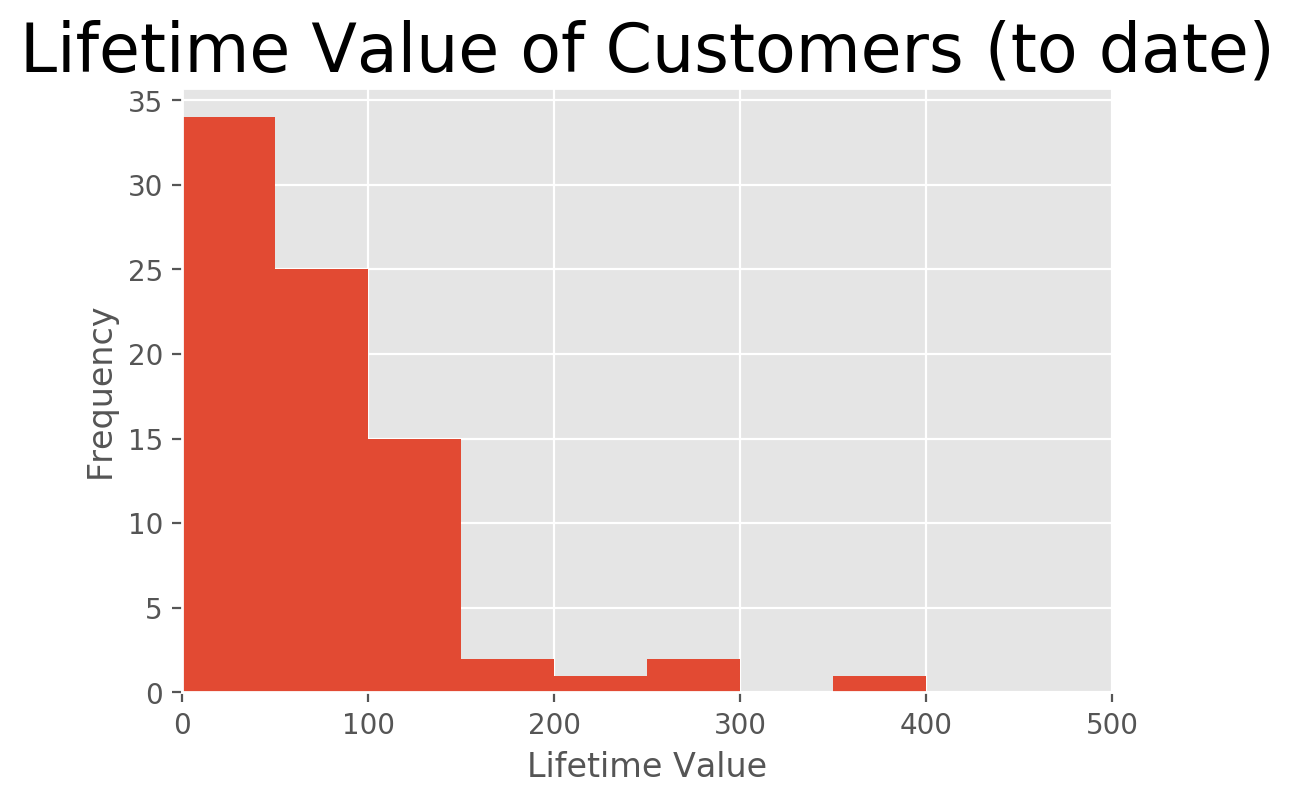

In [14]:
plot_options = {}
plot_options['bins'] = [i * 50 for i in range(10)]

lifetime_value(df['Customer ID'].values, df['Net Sales'].values, plot_options=plot_options)
plt.xlim([0, 500])
plt.show()